## 이미지 필터링
실제로 원본 이미지를 선명하게 하거나 흐리게 만드는 데 사용할 작은 매트릭스<br>
opencv에서 이미지를 매끄럽게 만드는 방법
> 예시로, 이미지 임계값 및 가장자리 감지에 사용됨. 또한 이러한 블러링 기술은 일반적으로 노이즈를 줄이는 데 사용되며 저해상도 이미지에서 픽셀 효과를 줄이기 위해 적용할 수도 있다.
- 평균화 필터(필터 크기가 커질수록 이미지가 더 흐려짐)
> opencv에서 평균화를 수행하기 위해 cv2.blur() 및 cv2.boxFilter() 함수를 모두 사용한다. 필요한 인수는 두 가지이다. 흐르게 처리하려는 이미지와 필터 크기이다. 필터 크기가 커질수록 출력이미지가 더 흐려지는 것을 보여주기 위해 필터에 세 가지 다른 크기를 선택한다. 필터 결과가 결합되어 함수와 함께 쌓인다. -> np.hstack() = 배열을 옆으로 결합하고 싶을 때 사용한다.

### 기본적인 이미지 처리 기술을 이용한 이미지 선명하게 해보기
- 이미지 읽기 블러처리 : 출력 이미지가 상당히 흐릿하다. 이미지를 매끄럽게 만들고 싶을 때 노이즈를 제거해야 한다.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 이미지 읽기 -> 그레이 스케일 변환
image = cv2.imread("./data/car.png", 0)

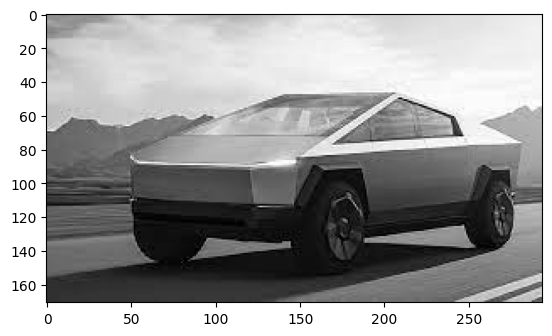

In [3]:
# 색상의 문제 발생 BGR >> RGB 컨버터 필요
plt.imshow(image, 'gray')
plt.show()

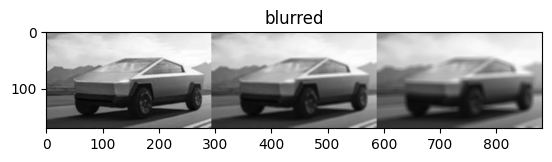

In [5]:
# 이미지 선명하게 처리하기
blurred_1 = np.hstack([
    cv2.blur(image, (3,3)),
    cv2.blur(image, (5,5)),
    cv2.blur(image, (9,9)),
])

plt.imshow(blurred_1, 'gray')
plt.title('blurred')
plt.show()

## 가우시안 필터 적용
평균화 필터 외에도 이미지 블러링을 수행하기 위해 몇 가지 다른 공통 필터를 사용할 수 있다. 이미지 처리에서 가장 일반적으로 사용되는 커널인 가우시안 필터가 있다. 이 필터를 생성하기 위해 유명한 가우시안 함수를 사용한다. 이 함수는 이벤트가 평균값을 중심으로 발생할 확률을 나타낸다. 또한 이 함수의 표준 편차 sigma(시그마)는 이 분포의 폭을 제어한다. 이 함수값을 샘플링해 가우시안 필터 행렬에 대한 계수를 얻는다. 다른 sigma(시그마) 값의 효과는 다음 이미지에서 관찰할 수 있다.

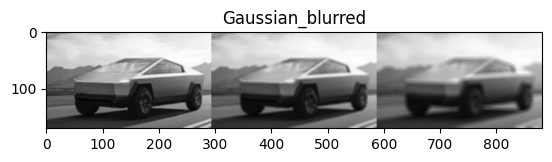

In [7]:
# 이미지 읽기
image = cv2.imread('./data/car.png', 0)

Gaussian_blurred_1 = np.hstack([
    cv2.GaussianBlur(image, (3,3),0),
    cv2.GaussianBlur(image, (5,5),0),
    cv2.GaussianBlur(image, (9,9),0)
])

plt.imshow(blurred_1, 'gray')
plt.title('Gaussian_blurred')
plt.show()

선명화 프로세스는 일반적으로 이미지의 가장자리를 향상시키는 데 사용된다. 우리가 사용할 수 있는 많은 필터가 있지만 이미지를 선명하게 할 수 있는 필터는 cv2.filter2D() 임의의 필터이다. 이 필터로 이미지를 처리하는 기능을 사용할 것이다. 종종 컬러 이미지를 선명하게 하는데 사용되는 필터이다.

## 이미지 선명하게 하기

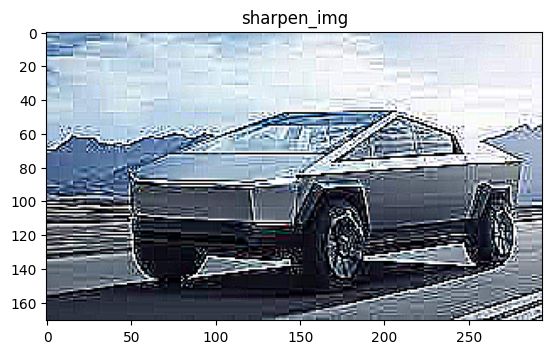

In [8]:
# 이미지 읽기
image = cv2.imread('./data/car.png', 1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Creating our sharpening filter
filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])

# Applying cv2.filter2D function on our Cybertruck image
sharpen_img = cv2.filter2D(image, -1, filter)

plt.imshow(sharpen_img)
plt.title('sharpen_img')
plt.show()

## 샤프닝 필터 버전 - 멕시칸 햇 또는 라플라시안 필터
이미지 처리 기술 중 하나로, 이미지의 선명도를 향상시키는 데 사용된다. 샤프닝 필터는 이미지의 고주파 성분을 강화하여 이미지의 선명한 경계를 강조함으로써 이미지를 더 선명하게 만들어준다.<br>
멕시칸 햇 필터는 이미지의 경계선 부분을 부드럽게 만들어주는 필터로, 이미지의 선명도를 낮추는 효과가 있다. 라플라시안 필터는 이미지의 경계선 부분의 높고 낮은 빛의 변화를 감지하여 선명도를 강조하는 효과가 있다.

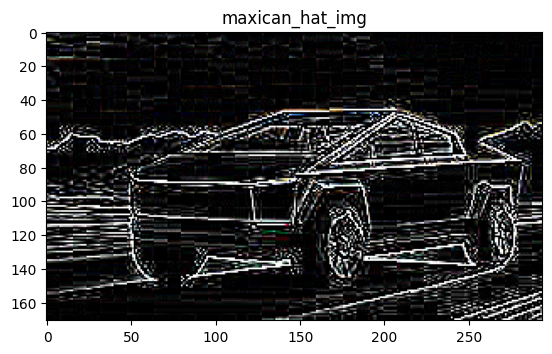

In [10]:
# 이미지 읽기
image = cv2.imread('./data/car.png', 1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

filter = np.array([[-1,-1,-1], [-1,9,-1],[-1,-1,-1]])

sharpen_img_1 = cv2.filter2D(image, -1, filter)

filter = np.array([[0,0,-1,0,0],[0,-1,-2,-1,0],[-1,-2,16,-2,-1],[0,-1,-2,-1,0],[0,0,-1,0,0]])

maxican_hat_img1 = cv2.filter2D(image, -1, filter)

plt.imshow(maxican_hat_img1)
plt.title('maxican_hat_img')
plt.show()

## Custom filter 적용하기

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

./data\apple.png
./data\box.png
./data\car.png
./data\cat.png
./data\jennie.png
./data\lemon.png
./data\resize_image.png


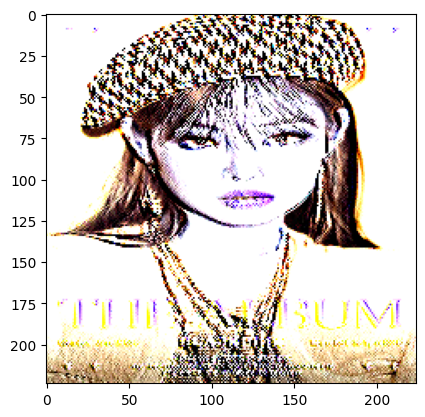

In [8]:
image_path = './data'
image_list = glob.glob(os.path.join(image_path, '*.png'))

for path in image_list :
    print(path)
    image = cv2.imread(path, 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # custom filter
    filter = np.array([[3,-2,-2], [-3,7,-5], [5,-1,-0]])
    
    # cusom filter 적용
    custom_filter_img = cv2.filter2D(image, -1, filter)
    
plt.imshow(custom_filter_img)
plt.show()

## 다양한 효과 필터

./data\apple.png
./data\box.png
./data\car.png
./data\cat.png
./data\jennie.png
./data\lemon.png
./data\resize_image.png


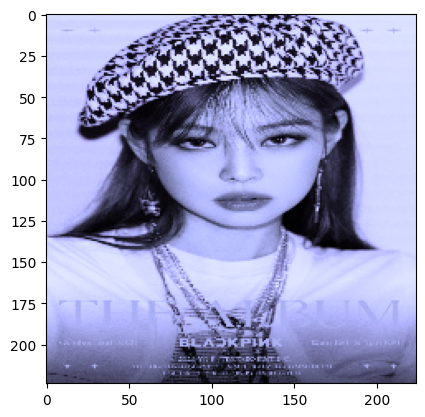

In [9]:
image_path = './data'
image_list = glob.glob(os.path.join(image_path, '*.png'))

for path in image_list :
    print(path)
    image = cv2.imread(path, 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # 효과 필터 적용
    filter = np.array([[0.272, 0.534, 0.131],
                       [0.119, 0.686, 0.168],
                       [0.393, 0.769, 0.189]])
    
    sepia_img = cv2.transform(image, filter)
    
plt.imshow(sepia_img)
plt.show()

## 엠보스 효과
필터의 방향에 따라 사용할 수 있는 여러 필터가 있다. 이 필터의 수직, 수평 또는 대각선 버전을 가질 수 있다. 수직 이미지를 사용하고 일단 이미지를 필터링하면 매우 낮은 차이를 얻게 된다. 즉, 출력 이미지가 다소 검정이 된다. 따라서 각 픽셀에 상수 128을 추가하고 결과 이미지를 회색으로 얻는다.

./data\apple.png
./data\box.png
./data\car.png
./data\cat.png
./data\jennie.png
./data\lemon.png
./data\resize_image.png


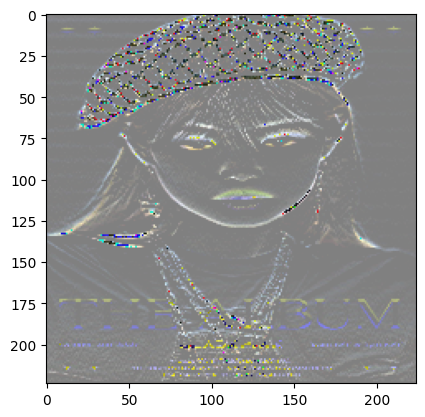

In [12]:
image_path = './data'
image_list = glob.glob(os.path.join(image_path, '*.png'))

for path in image_list :
    print(path)
    image = cv2.imread(path, 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # 엠보스 효과
    filter = np.array([[0,1,0], [0,0,0], [0,-1,0]])
    
    # cusom filter 적용
    emboss_img = cv2.filter2D(image, -1, filter)
    emboss_img = emboss_img + 128
    
plt.imshow(emboss_img)
plt.show()